In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor



In [140]:
df = pd.read_csv(r'C:\Users\c.s.markam\Downloads\Train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [142]:
mn1 = df.Item_Weight.mean()
mn1

12.857645184135976

In [143]:
df.Item_Weight = df.Item_Weight.fillna(mn1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [144]:
md1 = df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()[0]))
md1

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [145]:
#df1 = df[['Outlet_Size','Outlet_Type']]
#df2 = df1.groupby('Outlet_Type')['Outlet_Size'].agg(pd.Series.mode).to_frame()
#df2

In [146]:
mval = df['Outlet_Size'].isnull()
mval

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [149]:
df.loc[mval,'Outlet_Size'] = df.loc[mval,'Outlet_Type'].apply(lambda x : md1[x])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [153]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [154]:
sns.set()

<Figure size 600x600 with 0 Axes>

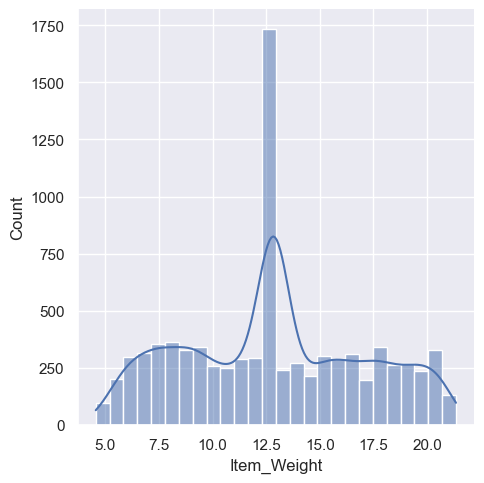

In [164]:
plt.figure(figsize = (6,6))
sns.displot(df['Item_Weight'], kde = True)
plt.show()

<Figure size 600x600 with 0 Axes>

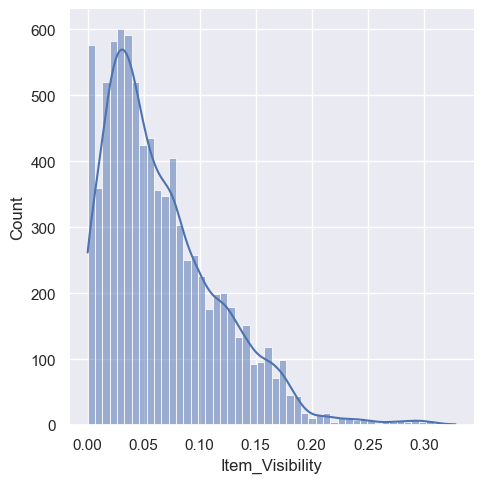

In [163]:
plt.figure(figsize = (6,6))
sns.displot(df['Item_Visibility'], kde = True)
plt.show()

<Figure size 600x600 with 0 Axes>

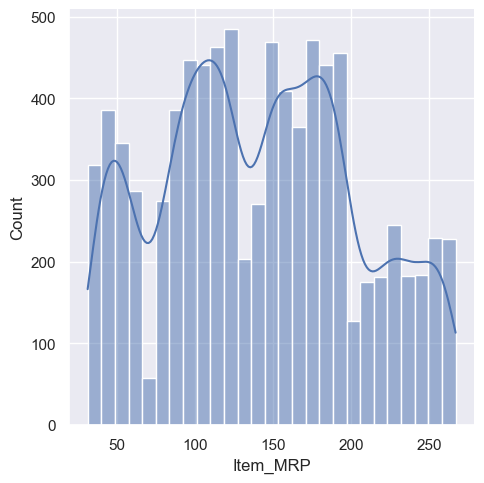

In [165]:
plt.figure(figsize = (6,6))
sns.displot(df['Item_MRP'], kde = True)
plt.show()

<Figure size 600x600 with 0 Axes>

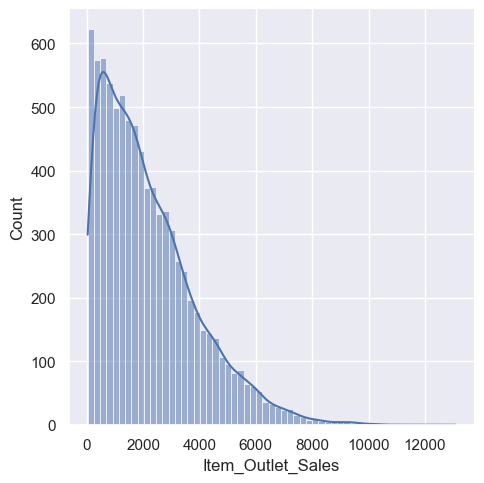

In [166]:
plt.figure(figsize = (6,6))
sns.displot(df['Item_Outlet_Sales'], kde = True)
plt.show()

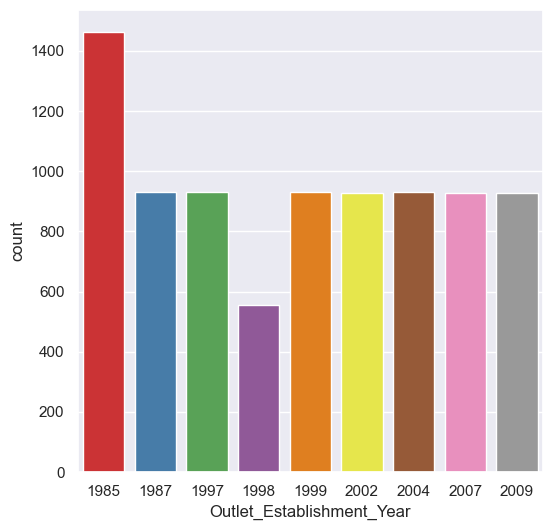

In [176]:
plt.figure(figsize = (6,6))
sns.countplot(data = df , x = 'Outlet_Establishment_Year', hue = 'Outlet_Establishment_Year', palette = 'Set1', legend = False )
#sns.displot(df['Outlet_Establishment_Year'], kde = True)
plt.show()

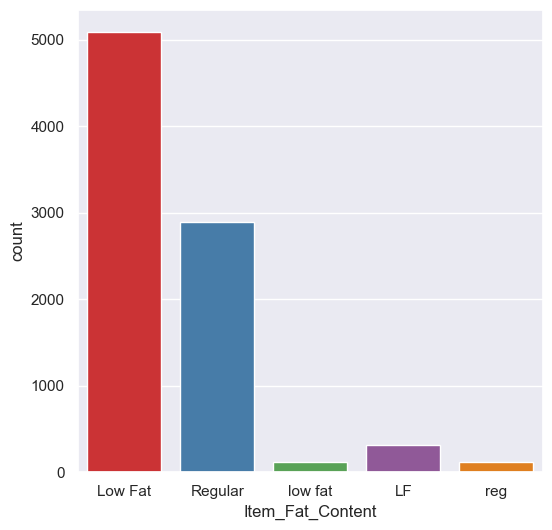

In [177]:
plt.figure(figsize = (6,6))
sns.countplot(data = df , x = 'Item_Fat_Content', hue = 'Item_Fat_Content', palette = 'Set1', legend = False )
plt.show()

In [199]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [204]:
df.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'} }, inplace = True)
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

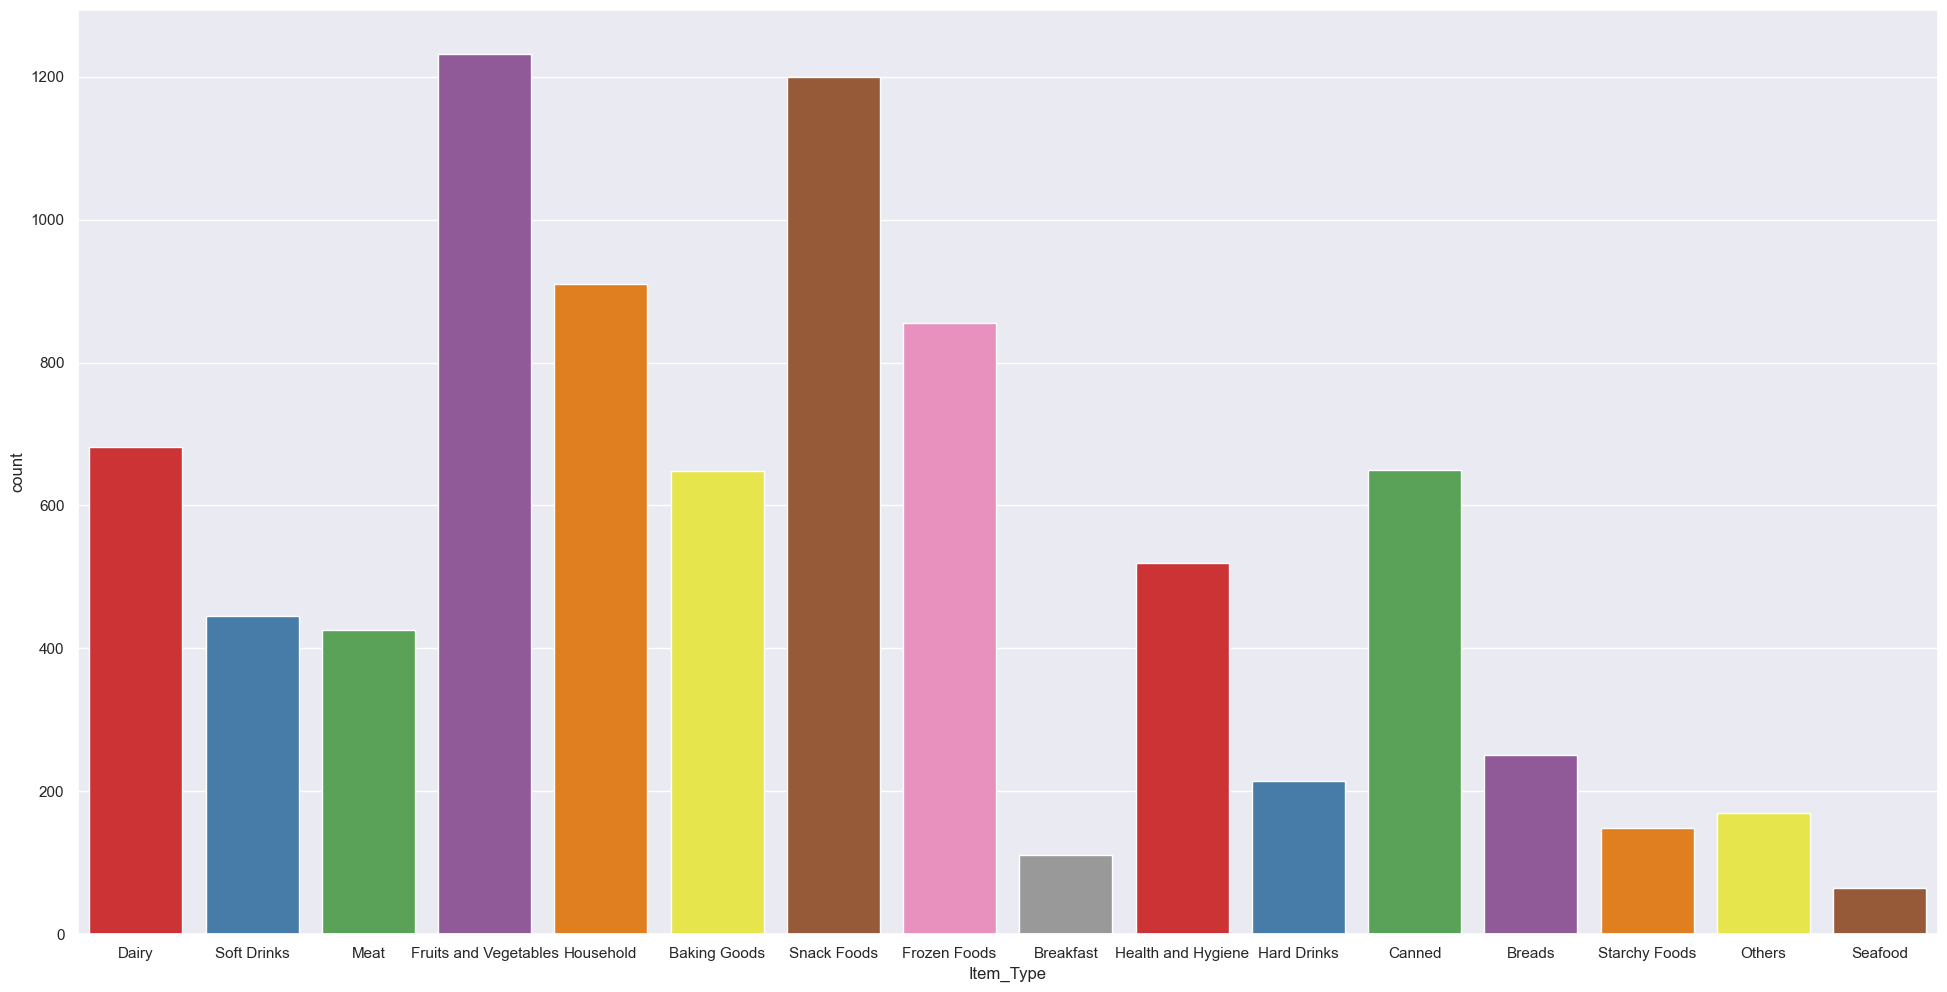

In [190]:
plt.figure(figsize = (24,12))
sns.countplot(data = df , x = 'Item_Type', hue = 'Item_Type', palette = 'Set1', legend = False )
plt.show()

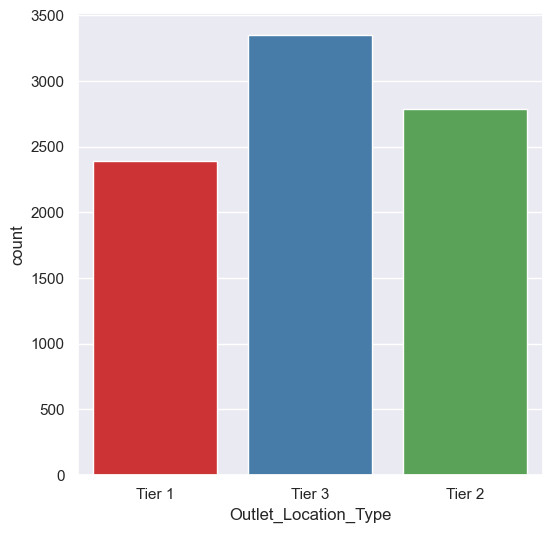

In [191]:
plt.figure(figsize = (6,6))
sns.countplot(data = df , x = 'Outlet_Location_Type', hue = 'Outlet_Location_Type', palette = 'Set1', legend = False )
plt.show()

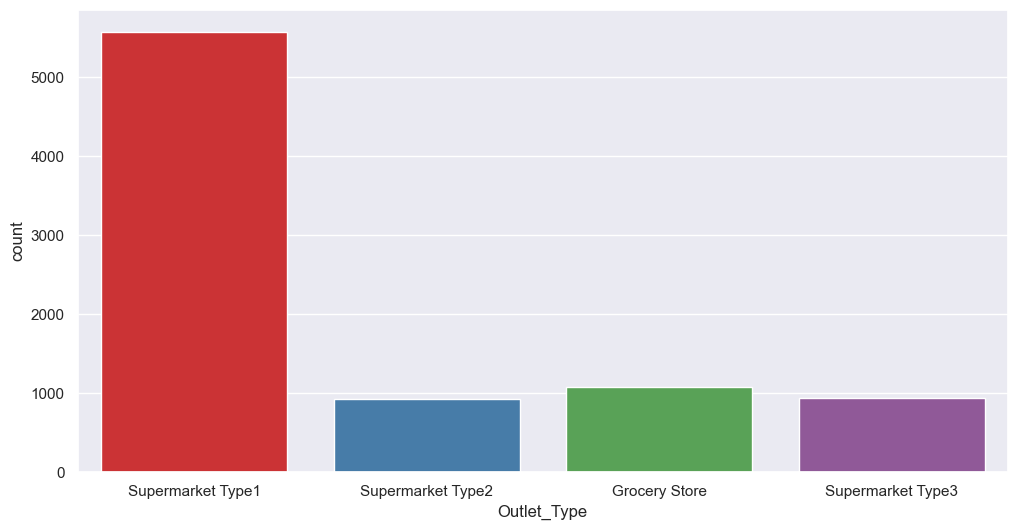

In [194]:
plt.figure(figsize = (12,6))
sns.countplot(data = df , x = 'Outlet_Type', hue = 'Outlet_Type', palette = 'Set1', legend = False )
plt.show()

In [ ]:
#Label Encoding

In [205]:
enc = LabelEncoder()

In [208]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,8,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,662,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,1121,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,1297,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,897,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,1357,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,681,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [209]:
df['Item_Identifier'] = enc.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = enc.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = enc.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = enc.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = enc.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = enc.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = enc.fit_transform(df['Outlet_Type'])

df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [ ]:
#Spliting into feature and target

In [211]:
X = df.drop('Item_Outlet_Sales', axis = 1)
X # Feature

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [212]:
Y = df['Item_Outlet_Sales']
Y # Target

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [ ]:
#train_test split

In [215]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state = 1)

In [218]:
#X.shape
#X_train.shape
#X_test.shape


(6818, 11)

In [239]:
#XGBRegressor model

In [234]:
reg = XGBRegressor()
reg.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Evaluation

In [235]:
pred_tr = reg.predict(X_train)

In [ ]:
#rms value

In [236]:
rms_tr = metrics.r2_score(Y_train,pred_tr)
rms_tr

0.8809357585915896

In [237]:
pred_tt = reg.predict(X_test)

In [238]:
rms_tt = metrics.r2_score(Y_test,pred_tt)
rms_tt

0.49709545082366713

In [ ]:
# Resolving overfitting in XGB

In [306]:
reg4 = XGBRegressor(colsample_bylevel= 0.5, colsample_bynode=0.5,
    colsample_bytree=0.5)
reg4.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.5, colsample_bynode=0.5, colsample_bytree=0.5,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, ...)

In [307]:
pred_tr3 = reg4.predict(X_train)
rms_tr3 = metrics.r2_score(Y_train,pred_tr3)
rms_tr3

0.7162967758285398

In [308]:
pred_tt3 = reg4.predict(X_test)
rms_tt3 = metrics.r2_score(Y_test,pred_tt3)
rms_tt3

0.5515207635101922

In [ ]:
#Multiple linear regression

In [242]:
from sklearn import linear_model

In [243]:
reg1 = linear_model.LinearRegression()

In [244]:
reg1.fit(X_train,Y_train)

LinearRegression()

In [247]:
pred_tr1=reg1.predict(X_train)
rms_tr1 = metrics.r2_score(Y_train,pred_tr1)
rms_tr1 

0.504161694256596

In [248]:
pred_tt1=reg1.predict(X_test)
rms_tt1 = metrics.r2_score(Y_test,pred_tt1)
rms_tt1 

0.5009842876890878

In [ ]:
# polynomial regression

In [249]:
from sklearn.preprocessing import PolynomialFeatures

In [250]:
reg2 = PolynomialFeatures(degree = 4)

In [254]:
X_trainP = reg2.fit_transform(X_train)

In [253]:
reg3 = linear_model.LinearRegression()

In [255]:
reg3.fit(X_trainP,Y_train)

LinearRegression()

In [259]:
pred_tr2=reg3.predict(X_trainP)
rms_tr2 = metrics.r2_score(Y_train,pred_tr2)
rms_tr2 

0.6338438257078541

In [260]:
X_testP = reg2.fit_transform(X_test)

In [261]:
pred_tt2=reg3.predict(X_testP)
rms_tt2 = metrics.r2_score(Y_test,pred_tt2)
rms_tt2 

0.543063601672525